가장 간단한 Regression 모델을 만들어 봅시다

1. 학습 데이터 만들기
   random을 활용해 함수를 만들어 봅시다. 

   100개의 데이터이고, 변수가 1개인 데이터셋을 만들어 봅시다. 

In [ ]:
# 간단한 데이터를 만들어 봅시다. 
import torch

x_train = torch.randn(100, 1)  # 100 x 1개 데이터 만들기, 정규분포 기반 랜덤 생성성, (n, 1)
y_train = 3 * x_train + 1 + 0.2 * torch.randn(100, 1)  # 출력 변수: y = 3x + 1 함수에 노이즈 추가된 형태


In [ ]:
x_train.shape, y_train.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [ ]:
?torch.randn

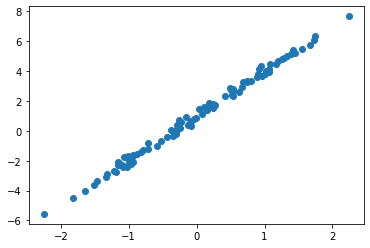

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)

2. 모델을 만들어 봅시다. 

* nn.Linear 한개만 사용하면 Linear Regression이 됩니다

In [ ]:
# 모델 생성
model = torch.nn.Linear(1, 1)  # 입력 차원, 출력 차원

3. 손실함수와 최적화 함수를 지정합니다. 

   Regression에서는 MSE를 사용하고, 최적화 함수는 Adam을 사용해보겠습니다.  

In [ ]:
# 손실 함수 정의
loss_fn = torch.nn.MSELoss()

# 최적화 함수 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

4. 학습을 시작합니다. 

In [ ]:
epochs = 100  # 학습 반복회수 설정

# 학습 시작
for epoch in range(epochs):

    # 모델의 추론값 계산
    y_pred = model(x_train)

    # 실제값과 차이로 오차 계산산
    loss = loss_fn(y_pred, y_train)

    # Gradient 계산하여 오차값을 Optimizer에 반영
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 10번째 epoch마다 손실 출력
    if (epoch + 1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

# 파라미터값 출력
print('Learned Parameters:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


Epoch [10/100], Loss: 0.0423
Epoch [20/100], Loss: 0.0422
Epoch [30/100], Loss: 0.0422
Epoch [40/100], Loss: 0.0422
Epoch [50/100], Loss: 0.0422
Epoch [60/100], Loss: 0.0422
Epoch [70/100], Loss: 0.0422
Epoch [80/100], Loss: 0.0422
Epoch [90/100], Loss: 0.0422
Epoch [100/100], Loss: 0.0422
Learned Parameters:
weight tensor([[2.9840]])
bias tensor([1.0121])


이번에는 Multivariate Regression 모델을 만들어봅시다

y = 3x_1 + 2x_2 + 1 을 만들어봅시다. 

입력변수가 2개로 늘어났으므로 모양이 변경됩니다. 

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

# 학습 데이터 생성
x_train = torch.randn(100, 2)  # 크기 (100, 2)인 입력 데이터
y_train = 3 * x_train[:, 0] + 2 * x_train[:, 1] + 1 + 0.2 * torch.randn(100)  # 크기 (100,)인 출력 데이터

# 모델 생성
model = nn.Linear(2, 1)  # 입력 차원 2, 출력 차원 1

# 손실 함수 정의
loss_fn = nn.MSELoss()

# optimizer 정의
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 학습 시작
epochs = 1000

for epoch in range(epochs):
  
    # 순전파 계산
    y_pred = model(x_train)

    # 손실 계산
    loss = loss_fn(y_pred.squeeze(), y_train)  # y_train과 y_pred 사이즈를 맞추기 위해 squeeze()함수를 사용용

    # gradient 계산 및 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 10번째 epoch마다 손실 출력
    if (epoch + 1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

# 학습된 모델 파라미터 출력
print('Learned Parameters:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


Epoch [10/100], Loss: 12.5196
Epoch [20/100], Loss: 11.4654
Epoch [30/100], Loss: 10.4901
Epoch [40/100], Loss: 9.5944
Epoch [50/100], Loss: 8.7753
Epoch [60/100], Loss: 8.0274
Epoch [70/100], Loss: 7.3444
Epoch [80/100], Loss: 6.7197
Epoch [90/100], Loss: 6.1475
Epoch [100/100], Loss: 5.6223
Epoch [110/100], Loss: 5.1396
Epoch [120/100], Loss: 4.6955
Epoch [130/100], Loss: 4.2866
Epoch [140/100], Loss: 3.9102
Epoch [150/100], Loss: 3.5636
Epoch [160/100], Loss: 3.2447
Epoch [170/100], Loss: 2.9514
Epoch [180/100], Loss: 2.6818
Epoch [190/100], Loss: 2.4342
Epoch [200/100], Loss: 2.2070
Epoch [210/100], Loss: 1.9986
Epoch [220/100], Loss: 1.8078
Epoch [230/100], Loss: 1.6332
Epoch [240/100], Loss: 1.4736
Epoch [250/100], Loss: 1.3280
Epoch [260/100], Loss: 1.1953
Epoch [270/100], Loss: 1.0745
Epoch [280/100], Loss: 0.9648
Epoch [290/100], Loss: 0.8652
Epoch [300/100], Loss: 0.7751
Epoch [310/100], Loss: 0.6936
Epoch [320/100], Loss: 0.6202
Epoch [330/100], Loss: 0.5540
Epoch [340/100],

In [28]:
y_pred.shape

torch.Size([100, 1])

In [29]:
y_train.shape

torch.Size([100])

* Pytorch 에서 제공되는 Loss Function

https://pytorch.org/docs/stable/nn.html#loss-functions

* Pytorch 에서 제공되는 Optimizer

https://pytorch.org/docs/stable/optim.html